In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


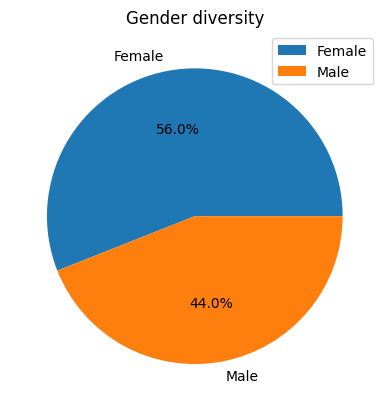

In [21]:
gender_count=data['Gender'].value_counts()
labels=gender_count.index
plt.pie(gender_count,labels=labels, autopct='%1.1f%%')
plt.legend()
plt.title("Gender diversity")
plt.show()

In [27]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


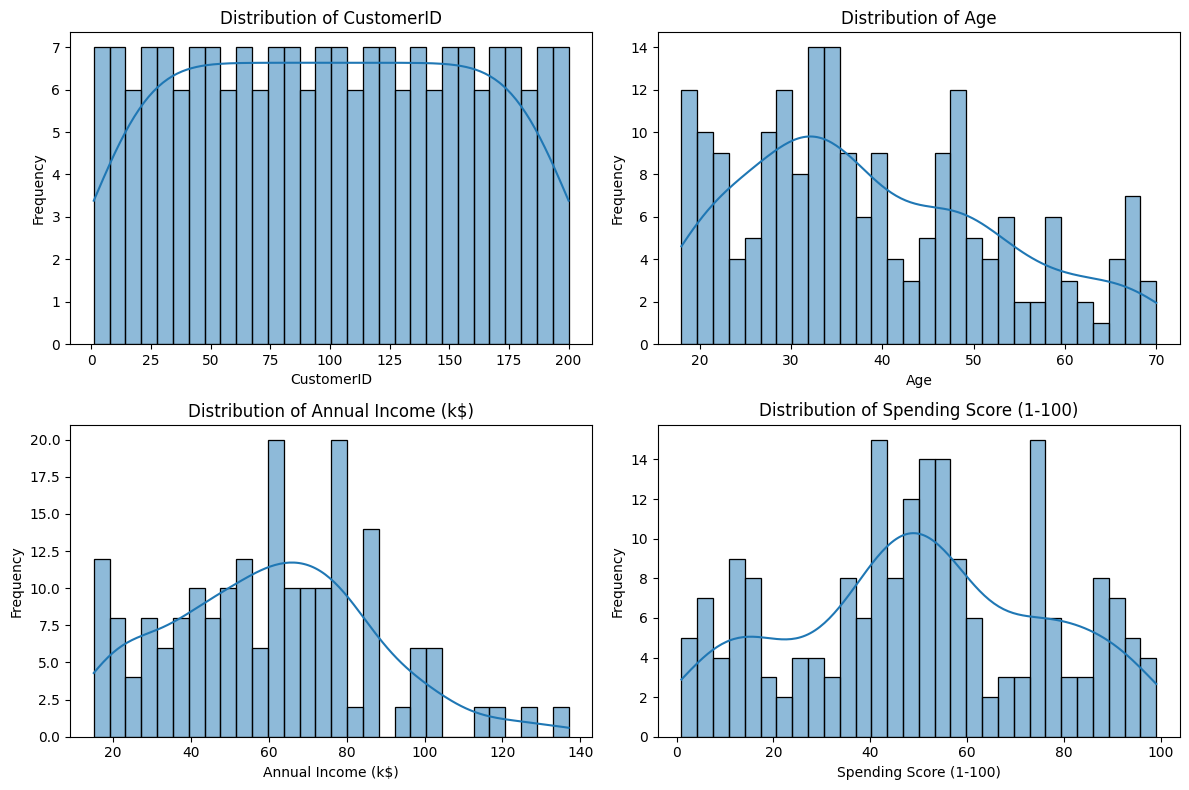

In [35]:
numeric_cols = data.select_dtypes(include='number').columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs = axs.flatten()

for i, col in enumerate(numeric_cols[:4]): 
    sns.histplot(data[col], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [38]:
df_new=pd.get_dummies(data,columns=['Gender'],drop_first=False)
df_new

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


<Axes: >

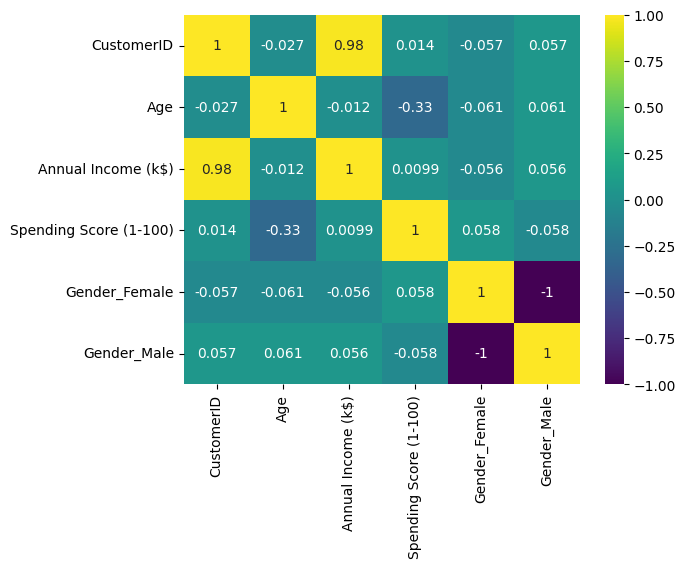

In [40]:
cor=df_new.corr()
sns.heatmap(cor,annot=True,cmap='viridis')